## Lab | Feature engineering

Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('C:/Users/ameli/IRONHACK/WEEK_7/DAY_1/MORNING_SESSION/learningSet.csv')

C:\Users\ameli\AppData\Local\Temp\ipykernel_1792\3771887276.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/ameli/IRONHACK/WEEK_7/DAY_1/MORNING_SESSION/learningSet.csv')


In [3]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


**Check for null values in the numerical columns.**

In [4]:
numerical = data.select_dtypes(include = np.number)
print(numerical.shape)
numerical.head()

(95412, 407)


,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [5]:
def nan_columns_above_threshold (df, percentual_threshold):
    nan_df = pd.DataFrame(df.isna().sum()/len(data)).reset_index()
    nan_df.columns = ['column_name', 'null_percentage']
    nan_above_threshold = nan_df[nan_df['null_percentage'] > percentual_threshold]
    return list(nan_above_threshold['column_name'])

In [6]:
cols_with_nan = nan_columns_above_threshold(numerical, 0)
print(cols_with_nan)
print(len(cols_with_nan))

['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'MSA', 'ADI', 'DMA', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12', 'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24'

In [7]:
for col in cols_with_nan:
    print('---', col, '---')
    print('Unique values:')
    print(numerical[col].unique(), '\n')
    print('Value counts')
    print(numerical[col].value_counts())
    print('\n')

--- AGE ---
Unique values:
[60. 46. nan 70. 78. 38. 65. 75. 72. 44. 62. 82. 74. 54. 42. 84. 49. 69.
 88. 30. 51. 66. 61. 68. 83. 45. 40. 48. 34. 80. 36. 50. 41. 71. 47. 33.
 63. 64. 59. 77. 73. 87. 89. 86. 52. 76. 26. 58. 39. 92. 81. 56. 79. 37.
 67. 57. 85. 53. 55. 94. 93. 43. 97. 90. 31. 29. 91. 28. 32. 35. 21. 27.
 24. 96. 95. 20. 98. 19. 22. 25. 23. 13. 16. 18. 11.  2.  1.  9. 17.  7.
  6. 10.  4. 14.  8.  3. 15.] 

Value counts
50.0    1930
76.0    1885
72.0    1813
68.0    1809
74.0    1801
        ... 
8.0        1
9.0        1
10.0       1
6.0        1
15.0       1
Name: AGE, Length: 96, dtype: int64


--- NUMCHLD ---
Unique values:
[nan  1.  2.  3.  4.  5.  6.  7.] 

Value counts
1.0    7792
2.0    3110
3.0    1101
4.0     316
5.0      59
6.0       7
7.0       1
Name: NUMCHLD, dtype: int64


--- INCOME ---
Unique values:
[nan  6.  3.  1.  4.  2.  7.  5.] 

Value counts
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtyp

[9409. 9506. 9408.   nan 9410. 9411.] 

Value counts
9409.0    63908
9408.0     5035
9506.0      801
9410.0       11
9411.0        9
Name: ADATE_22, dtype: int64


--- ADATE_23 ---
Unique values:
[9407.   nan 9406. 9312.] 

Value counts
9407.0    38877
9406.0      243
9312.0       22
Name: ADATE_23, dtype: int64


--- ADATE_24 ---
Unique values:
[9406.   nan 9405.] 

Value counts
9406.0    58161
9405.0      278
Name: ADATE_24, dtype: int64


--- RDATE_3 ---
Unique values:
[  nan 9607. 9606. 9704. 9806. 9610. 9608. 9605. 9609. 9803. 9703. 9705.
 9802. 9804. 9612.] 

Value counts
9606.0    105
9607.0     69
9704.0     21
9608.0     14
9605.0      7
9609.0      7
9703.0      4
9610.0      3
9705.0      3
9806.0      2
9802.0      2
9804.0      2
9612.0      2
9803.0      1
Name: RDATE_3, dtype: int64


--- RDATE_4 ---
Unique values:
[  nan 9609. 9704. 9606. 9604. 9605. 9602. 9610. 9512. 9601. 9511. 9804.
 9603. 9510. 9607. 9802. 9803. 9701. 9703. 9608. 9611. 9612.] 

Value counts
9605.0  

[   nan   5.    20.    15.    23.    25.    50.    10.    27.    12.
  17.    16.     2.    30.    11.    18.     7.     9.     6.    14.
   3.     4.     8.    21.    60.    28.    40.   250.    42.    35.
  36.    42.73  13.    19.    29.    32.    33.   130.    52.    26.
  22.    24.   103.    25.21   7.5  150.    38.   100.   125.    37.
  48.    14.7    2.5   39.    31.     8.7   26.45   1.    49.    53.
  19.5   34.   201.67  75.    45.    25.35  80.    57.    47.    41.
  17.32 200.     4.5   55.   155.    44.  ] 

Value counts
10.00    1698
15.00    1376
20.00    1341
5.00      937
25.00     637
         ... 
26.45       1
8.70        1
25.21       1
14.70       1
44.00       1
Name: RAMNT_7, Length: 75, dtype: int64


--- RAMNT_8 ---
Unique values:
[   nan  15.    20.     6.    10.     5.    12.    30.    25.     8.
  11.     7.    23.   100.    50.    21.    17.    31.     9.    16.
  13.    40.    24.     3.    35.    14.     4.    45.    15.75  18.
  27.    26.    28.    1

[  9.      nan   6.    10.     5.    12.     4.     3.    15.    20.
  50.    19.    16.    18.    25.     7.    11.    21.     8.   100.
   2.    30.    17.    13.    14.    22.     1.    40.    24.    31.
  23.    43.    51.    26.    44.    34.    35.    37.    48.    28.
  27.    60.    29.    13.4   41.    32.    75.    45.    10.5   36.
   7.5   33.    55.    62.   200.    42.     9.75  52.    88.   225.
  29.9   46.    85.    39.    53.    12.5  125.    58.   182.    38.
   1.5   91.   150.    12.22   7.16 158.  ] 

Value counts
10.00     3834
5.00      3262
15.00     1518
20.00     1169
7.00       930
          ... 
225.00       1
88.00        1
9.75         1
13.40        1
158.00       1
Name: RAMNT_24, Length: 75, dtype: int64


--- NEXTDATE ---
Unique values:
[9003. 9504. 9101. 8711. 8005. 9407. 8705. 8809. 9404.   nan 9512. 8910.
 9211. 9306. 9509. 8906. 8707. 9507. 8801. 9312. 9303. 9301. 9304. 9112.
 9109. 9602. 9505. 9205. 9102. 8706. 8703. 9601. 9401. 9210. 8804. 9111.

**Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.**

Bear in mind that Geocode2 column is not considered as numerical type.

- GEOCODE2: County Size Code.

In [8]:
print('Unique values:', data['GEOCODE2'].unique())
data['GEOCODE2'].value_counts(dropna=False)

Unique values: ['C' 'A' 'D' 'B' ' ' nan]


A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

We should first replace white spaces with nan


In [9]:
data['GEOCODE2'] = data['GEOCODE2'].replace(' ', np.nan)
print('Unique values:', data['GEOCODE2'].unique())
data['GEOCODE2'].value_counts(dropna=False)

Unique values: ['C' 'A' 'D' 'B' nan]


A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

As the number of null values is relatively low, we can impute these values with the mode.

In [10]:
mode_geocode2 = data['GEOCODE2'].mode()[0]
print('Mode value:', mode_geocode2)

Mode value: A


In [11]:
data['GEOCODE2'] = data['GEOCODE2'].fillna(mode_geocode2)
print('Unique values:', data['GEOCODE2'].unique())
data['GEOCODE2'].value_counts(dropna=False)

Unique values: ['C' 'A' 'D' 'B']


A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

* WEALTH1: Wealth Rating

In [12]:
numerical['WEALTH1'].unique()

array([nan,  9.,  1.,  4.,  2.,  6.,  0.,  5.,  8.,  3.,  7.])

In [13]:
print('Unique values:', numerical['WEALTH1'].unique())
numerical['WEALTH1'].value_counts(dropna=False)

Unique values: [nan  9.  1.  4.  2.  6.  0.  5.  8.  3.  7.]


NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

It seems that there are so many missing values that we may consider dropping this column. Let's calculate the null percentage and decide what to do with this column.

In [14]:
wealth_null_percentage = (numerical['WEALTH1'].isna().sum()/len(numerical))*100
wealth_null_percentage

46.882991657233895

Ok, there are too many missing values. But the manager told us that this column is important, so instead of dropping it, we're going to imputate the missing values.

In [15]:
numerical['WEALTH1_PLOTS'] = numerical['WEALTH1'].copy()
numerical['WEALTH1_KNN'] = numerical['WEALTH1'].copy()

mean = np.mean(numerical['WEALTH1'].notna())
print('Mean:', mean)
median = np.median(numerical['WEALTH1'].notna())
print('Median:', median)

Mean: 0.5311700834276611
Median: 1.0


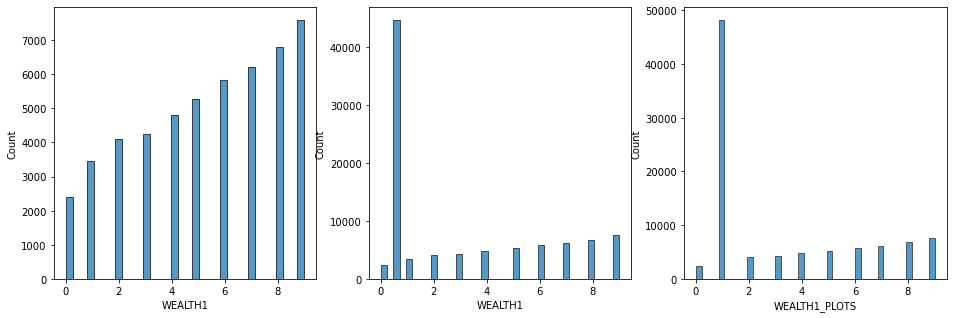

In [16]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['WEALTH1'], ax = ax[0])
sns.histplot(numerical["WEALTH1"].fillna(mean), ax = ax[1])
sns.histplot(numerical['WEALTH1_PLOTS'].fillna(median),ax = ax[2])
plt.show()

Probably, it is not a good idea to impute the missing values with the mean or the median, although if we need to choose one method, we'd probably go with the mean. 

If we want to test another method, we could try to impute the missing values with KNNImputer.

In [20]:
# numerical['WEALTH1'] = numerical['WEALTH1'].fillna(mean)
# numerical['WEALTH1'].isna().sum()

from sklearn.impute import KNNImputer

array_val = np.array(numerical['WEALTH1_KNN'])

wealth1_knn_values = []

for n in range(2,6):
    imputer = KNNImputer(n_neighbors= n)
    imputed_val = imputer.fit_transform((array_val).reshape(-1,1))
    wealth1_knn_values.append(imputed_val)

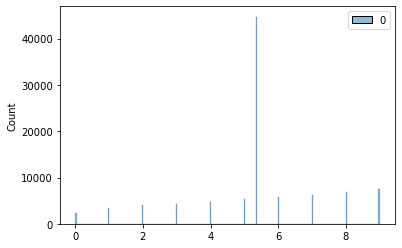

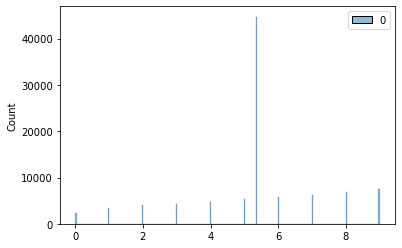

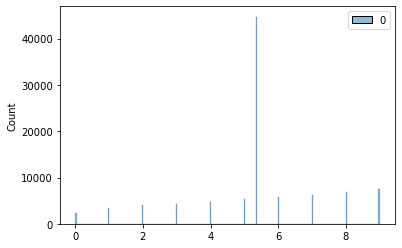

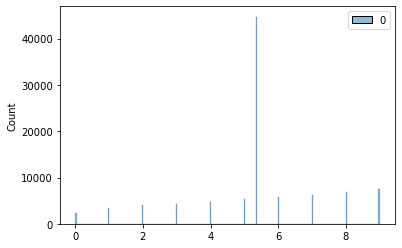

In [21]:
for lst in wealth1_knn_values:
    sns.histplot(lst)
    plt.show()

It seems to me that there's no difference when using n_neighbor = 2 or n_neighbor = 5. Using this method, we should round the imputed value (because these are categorical values), and we would end with the following distribution:

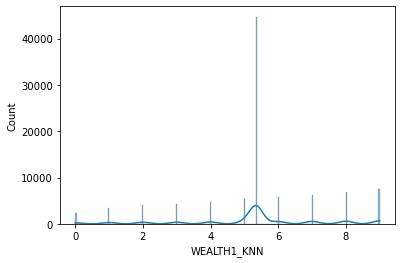

In [31]:
numerical['WEALTH1_KNN'] = wealth1_knn_values[0]
sns.histplot(numerical['WEALTH1_KNN'], kde=True)
plt.show()

* ADI: ADI code.

In [ ]:
print('Unique values:', numerical['ADI'].unique())
numerical['ADI'].value_counts(dropna=False)

In [ ]:
adi_null_percentage = (numerical['ADI'].isna().sum()/len(numerical))*100
print('% of nan values:', round(adi_null_percentage,2))

* DMA: Designated Market Areas code.

In [ ]:
print('Unique values:', numerical['DMA'].unique())
numerical['DMA'].value_counts(dropna=False)

In [ ]:
dma_null_percentage = (numerical['DMA'].isna().sum()/len(numerical))*100
print('% of nan values:', round(dma_null_percentage,2))

* MSA: Metropolitan Statistical Area code.

In [ ]:
print('Unique values:', numerical['MSA'].unique())
numerical['MSA'].value_counts(dropna=False)

In [ ]:
msa_null_percentage = (numerical['MSA'].isna().sum()/len(numerical))*100
print('% of nan values:', round(msa_null_percentage,2))

Could it be that those rows that contain missing values in ADI Code column, they contain nan values from MSA and DMA as well?

In [ ]:
nan_rows = numerical[numerical['MSA'].isna()]
nan_rows[['MSA', 'ADI', 'DMA']]

Ok, we can drop these rows.

In [ ]:
nan_rows_idx = list(nan_rows.index)
numerical.drop(nan_rows_idx, axis = 0, inplace = True)
print('Missing values of MSA:', numerical['MSA'].isna().sum())
print('Missing values of DMA:', numerical['DMA'].isna().sum())
print('Missing values of ADI:', numerical['ADI'].isna().sum())